Name: **Ayesha Sami**  
Email: `msami_be21@thapar.edu`  
Roll No: **102117110**  
Group: **4CS4**  
Start Timestamp: Wed Sep 11 10:00 AM  

## Instructions

1. **Read and Summarize the Paper:**  
   Read the paper and provide a summary in about 50 words.

2. **Download and Analyze the Dataset:**  
   Download the dataset mentioned in the paper. Perform a statistical analysis and describe the dataset for future reference. (Include code snippets in your `.ipynb` file to support your analysis.)

3. **Train a Classifier:**  
   Train a classifier to distinguish the commands present in the dataset.

4. **Report Performance Results:**  
   Report the classifier's performance results using standard benchmarks.

5. **Create a New Voice Dataset:**  
   Record around 30 samples of each command in your voice, creating a new dataset with a unique user ID. You may use a timer on your computer to synchronize the recordings.

6. **Fine-tune the Classifier:**  
   Fine-tune your classifier to improve performance on your voice recordings.

7. **Report the Results:**  
   Report the results after fine-tuning.


## Data Loading

In [ ]:
# data set loading
!wget -O dataset.tar.gz http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

--2024-09-12 16:43:20--  http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.65.123, 172.217.164.27, 172.217.0.91, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.65.123|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428923189 (2.3G) [application/gzip]
Saving to: ‘dataset.tar.gz’

dataset.tar.gz      100%[===================>]   2.26G   139MB/s    in 21s     

2024-09-12 16:43:41 (110 MB/s) - ‘dataset.tar.gz’ saved [2428923189/2428923189]



In [ ]:
import os
import tarfile
import numpy as np
import tensorflow as tf  # Import TensorFlow

tar_file_path = 'dataset.tar.gz'  # Replace with the path to your tar.gz file
extracted_dir = 'speech_commands_dataset'  # Directory to extract to

# Check if the directory already exists to avoid re-extracting
if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)  # Create the directory if it doesn't exist
    with tarfile.open(tar_file_path, 'r:gz') as tar:
        tar.extractall(extracted_dir)
        print(f"Extracted to {extracted_dir}")

# List the contents of the extracted folder
commands = np.array(tf.io.gfile.listdir(extracted_dir))
commands = commands[(commands != 'README.md') & (commands != '.DS_Store') & (commands != 'background_noise')]

print('Commands:', commands)


Extracted to speech_commands_dataset
Commands: ['house' 'learn' 'marvin' 'two' 'nine' 'LICENSE' 'left' 'seven' 'right'
 'eight' 'follow' '_background_noise_' 'on' 'forward' 'three' 'visual'
 'five' 'sheila' 'tree' 'cat' 'dog' 'six' 'testing_list.txt' 'up' 'stop'
 'go' 'one' 'happy' 'bird' 'off' 'no' 'backward' 'bed'
 'validation_list.txt' 'wow' 'zero' 'four' 'yes' 'down']


In [ ]:
import os

# Print the contents of the main directory to check the structure
for root, dirs, files in os.walk(extracted_dir):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files}")
    print()


Root: speech_commands_dataset
Dirs: ['house', 'learn', 'marvin', 'two', 'nine', 'left', 'seven', 'right', 'eight', 'follow', '_background_noise_', 'on', 'forward', 'three', 'visual', 'five', 'sheila', 'tree', 'cat', 'dog', 'six', 'up', 'stop', 'go', 'one', 'happy', 'bird', 'off', 'no', 'backward', 'bed', 'wow', 'zero', 'four', 'yes', 'down']
Files: ['LICENSE', '.DS_Store', 'README.md', 'testing_list.txt', 'validation_list.txt']

Root: speech_commands_dataset/house
Dirs: []
Files: ['a84dee7b_nohash_1.wav', '0c2d2ffa_nohash_0.wav', '5aac2efa_nohash_1.wav', 'cb164eea_nohash_0.wav', 'b6ebe225_nohash_0.wav', 'd9b50b8b_nohash_0.wav', '36de13e1_nohash_0.wav', '533c6564_nohash_0.wav', '264f471d_nohash_0.wav', '8931f494_nohash_1.wav', 'a77fbcfd_nohash_0.wav', '229978fd_nohash_0.wav', 'd4082f3e_nohash_0.wav', 'f5733968_nohash_0.wav', '62605293_nohash_1.wav', '3291330e_nohash_0.wav', '0d90d8e1_nohash_0.wav', 'aa233654_nohash_0.wav', '81332c92_nohash_0.wav', '1aeef15e_nohash_0.wav', '8a0457c9_noha

In [ ]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
import os
import tarfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Download and extract the dataset
tar_file_path = 'dataset.tar.gz'
extracted_dir = 'speech_commands_dataset'

if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)
    with tarfile.open(tar_file_path, 'r:gz') as tar:
        tar.extractall(extracted_dir)
        print(f"Extracted to {extracted_dir}")

# List the contents of the extracted folder
commands = np.array(tf.io.gfile.listdir(extracted_dir))
commands = commands[(commands != 'README.md') & (commands != '.DS_Store') & (commands != 'background_noise')]

print('Commands:', commands)


Commands: ['house' 'learn' 'marvin' 'two' 'nine' 'LICENSE' 'left' 'seven' 'right'
 'eight' 'follow' '_background_noise_' 'on' 'forward' 'three' 'visual'
 'five' 'sheila' 'tree' 'cat' 'dog' 'six' 'testing_list.txt' 'up' 'stop'
 'go' 'one' 'happy' 'bird' 'off' 'no' 'backward' 'bed'
 'validation_list.txt' 'wow' 'zero' 'four' 'yes' 'down']


In [ ]:
data_dir = extracted_dir

# Load dataset
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset='both')

label_names = np.array(train_ds.class_names)
print("Label names:", label_names)


Found 105835 files belonging to 36 classes.
Using 84668 files for training.
Using 21167 files for validation.
Label names: ['_background_noise_' 'backward' 'bed' 'bird' 'cat' 'dog' 'down' 'eight'
 'five' 'follow' 'forward' 'four' 'go' 'happy' 'house' 'learn' 'left'
 'marvin' 'nine' 'no' 'off' 'on' 'one' 'right' 'seven' 'sheila' 'six'
 'stop' 'three' 'tree' 'two' 'up' 'visual' 'wow' 'yes' 'zero']


In [ ]:
def squeeze(audio, labels):
    audio = tf.squeeze(audio, axis=-1)
    return audio, labels

train_ds = train_ds.map(squeeze, tf.data.AUTOTUNE)
val_ds = val_ds.map(squeeze, tf.data.AUTOTUNE)

test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)


In [ ]:
for example_audio, example_labels in train_ds.take(1):
    print("Example Audio Shape:", example_audio.shape)
    print("Example Labels Shape:", example_labels.shape)



Example Audio Shape: (64, 16000)
Example Labels Shape: (64,)


## Data Analytics and Visualization

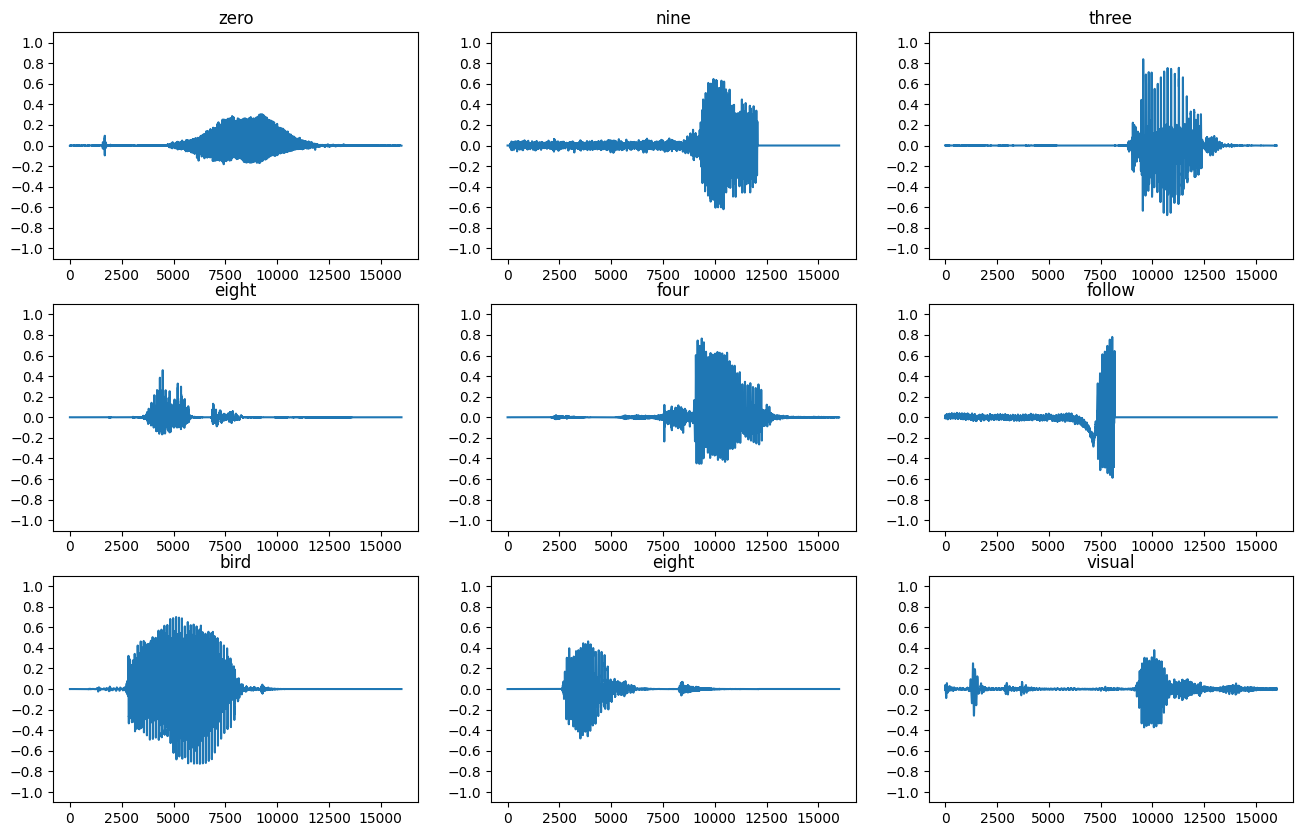

In [ ]:
plt.figure(figsize=(16, 10))
rows = 3
cols = 3
n = rows * cols
for i in range(n):
    plt.subplot(rows, cols, i+1)
    audio_signal = example_audio[i]
    plt.plot(audio_signal)
    plt.title(label_names[example_labels[i]])
    plt.yticks(np.arange(-1.2, 1.2, 0.2))
    plt.ylim([-1.1, 1.1])
plt.show()


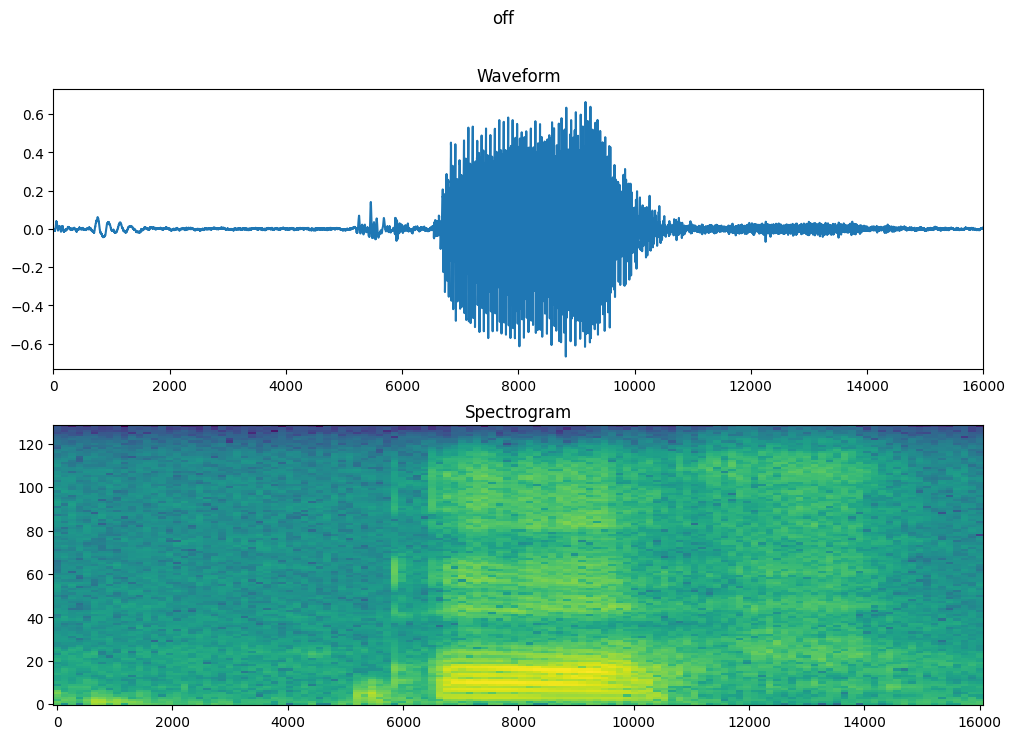

In [ ]:
def get_spectrogram(waveform):
    # Convert the waveform to a spectrogram via a STFT.
    spectrogram = tf.signal.stft(
        waveform, frame_length=255, frame_step=128)
    # Obtain the magnitude of the STFT.
    spectrogram = tf.abs(spectrogram)
    # Add a `channels` dimension.
    spectrogram = spectrogram[..., tf.newaxis]
    return spectrogram

def plot_spectrogram(spectrogram, ax):
    if len(spectrogram.shape) > 2:
        assert len(spectrogram.shape) == 3
        spectrogram = np.squeeze(spectrogram, axis=-1)
    # Convert the frequencies to log scale and transpose.
    log_spec = np.log(spectrogram.T + np.finfo(float).eps)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)

# Plot the waveform and its spectrogram
for example_audio, example_labels in train_ds.take(1):
    waveform = example_audio[0]
    spectrogram = get_spectrogram(waveform)

    fig, axes = plt.subplots(2, figsize=(12, 8))
    timescale = np.arange(waveform.shape[0])
    axes[0].plot(timescale, waveform.numpy())
    axes[0].set_title('Waveform')
    axes[0].set_xlim([0, 16000])

    plot_spectrogram(spectrogram.numpy(), axes[1])
    axes[1].set_title('Spectrogram')
    plt.suptitle(label_names[example_labels[0].numpy()])
    plt.show()


In [ ]:
for i in range(3):
  label = label_names[example_labels[i]]
  waveform = example_audio[i]
  spectrogram = get_spectrogram(waveform)

  print('Label:', label)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  print('Audio playback')
  display.display(display.Audio(waveform, rate=16000))

Label: off
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: four
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: eight
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


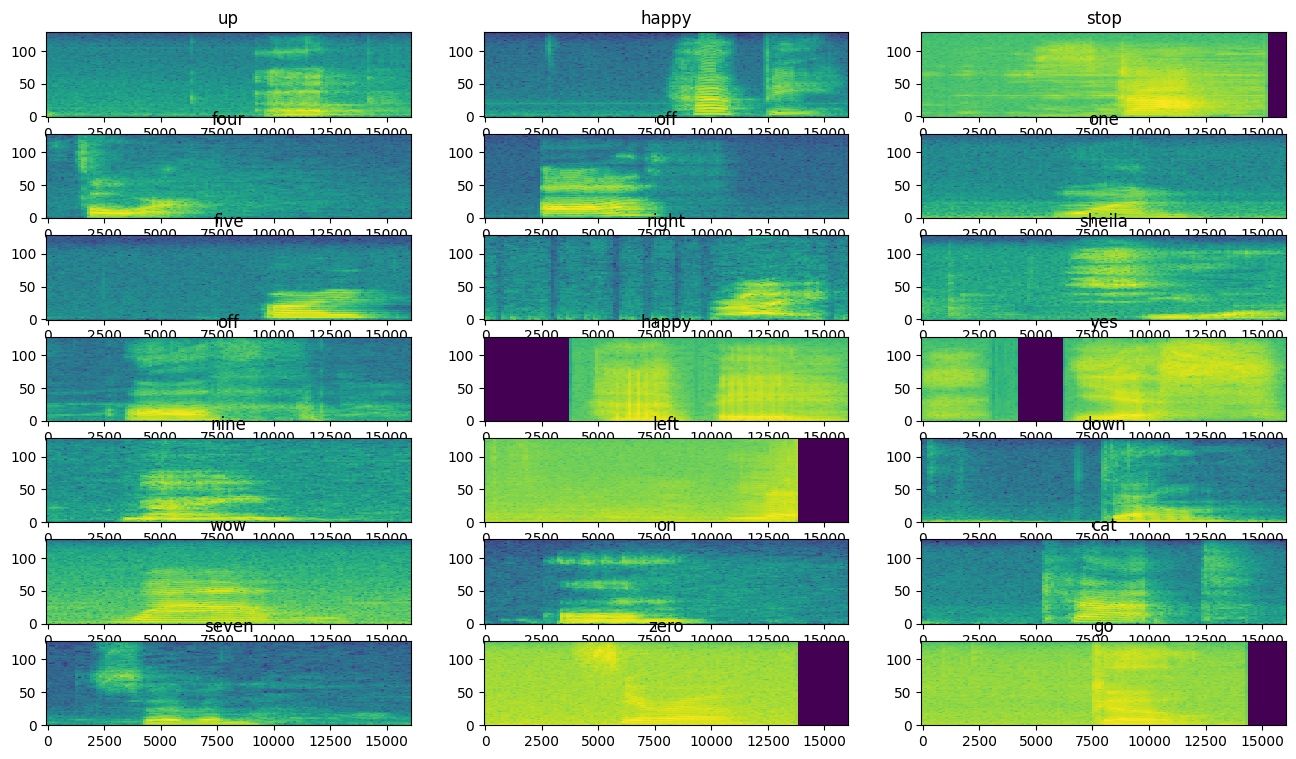

In [ ]:
def make_spec_ds(ds):
  return ds.map(
      map_func=lambda audio,label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)

train_spectrogram_ds = make_spec_ds(train_ds)
val_spectrogram_ds = make_spec_ds(val_ds)
test_spectrogram_ds = make_spec_ds(test_ds)

for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break

rows = 7
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(example_spectrograms[i].numpy(), ax)
    ax.set_title(label_names[example_spect_labels[i].numpy()])

plt.show()

## Model Building using Simple CNN

In [ ]:
train_spectrogram_ds = train_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_spectrogram_ds = val_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)
test_spectrogram_ds = test_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)
num_labels = len(label_names)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (124, 129, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization (Normalization)        │ (None, 32, 32, 1)           │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,629,223 (6.21 MB)

 Trainable params: 1,629,220 (6.21 MB)

 Non-trainable params: 3 (16.00 B)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [ ]:
EPOCHS = 2
history = model.fit(
    train_spectrogram_ds,
    validation_data=val_spectrogram_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/2
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 318s 239ms/step - accuracy: 0.2915 - loss: 2.5612 - val_accuracy: 0.7007 - val_loss: 1.0531
Epoch 2/2
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 288s 213ms/step - accuracy: 0.6264 - loss: 1.2664 - val_accuracy: 0.7689 - val_loss: 0.8217


Text(0, 0.5, 'Accuracy [%]')

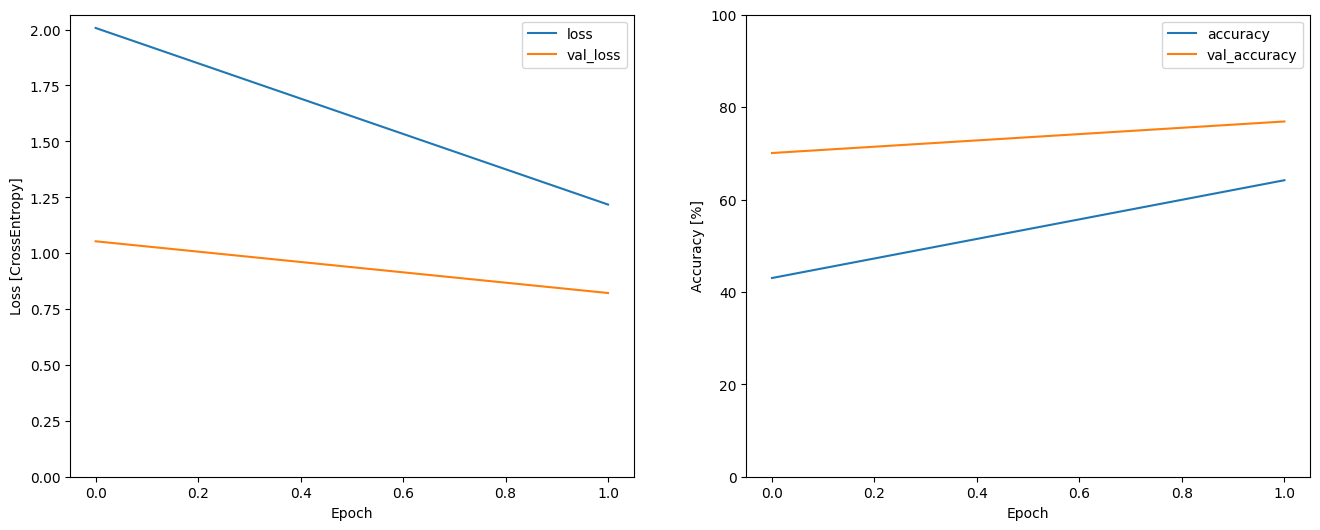

In [ ]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [ ]:
model.evaluate(test_spectrogram_ds, return_dict=True)

166/166 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.7753 - loss: 0.8143


{'accuracy': 0.7756198644638062, 'loss': 0.8095039129257202}

In [ ]:
y_pred = model.predict(test_spectrogram_ds)


166/166 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step


In [ ]:
y_pred = tf.argmax(y_pred, axis=1)


In [ ]:
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

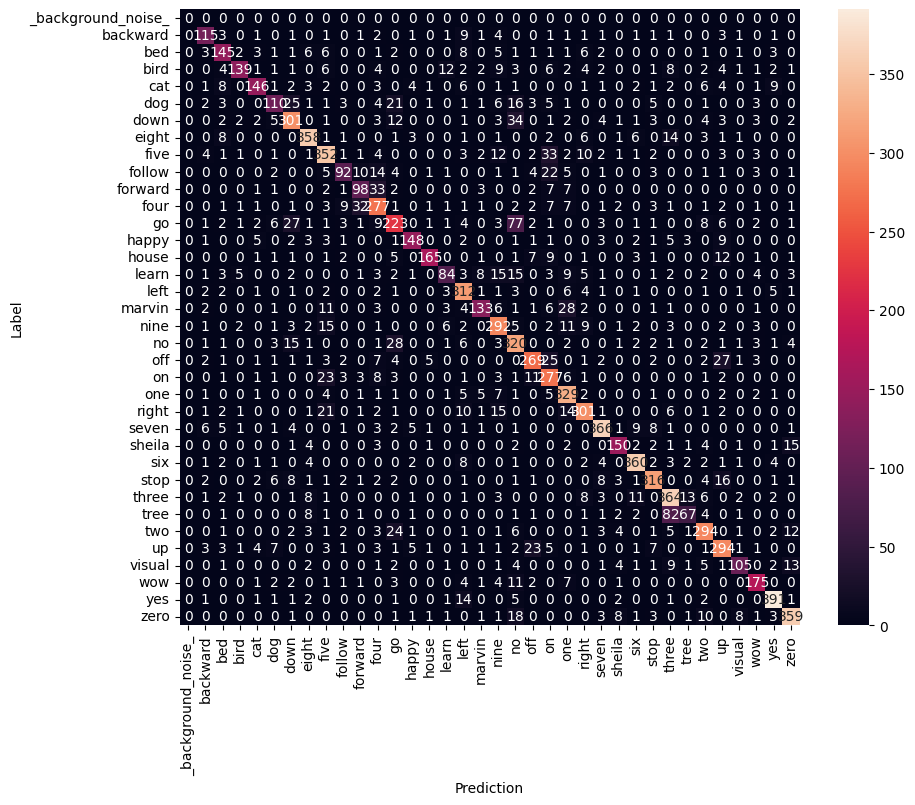

In [ ]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks')